In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1, 1)
print(model)

x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))
print(model.parameters())
[w, b] = model.parameters()
print(w)
print(b)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)
<generator object Module.parameters at 0x7e1ea371e260>
Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [ ]:
X = torch.randn(20, 1)*10
y = X + 3*torch.randn(20, 1)
print(X)
print(y)

[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

tensor([[ -6.5398],
        [-16.0948],
        [ -1.0017],
        [ -6.0919],
        [ -6.6291],
        [  8.0731],
        [  4.3914],
        [ 11.7120],
        [ 17.6743],
        [ -0.9536],
        [  1.3937],
        [-15.7850],
        [ -7.9807],
        [ -1.3162],
        [ -7.9844],
        [  3.3573],
        [  2.7533],
        [ 17.1630],
        [ -0.5614],
        [  9.1070]])
tensor([[ -6.0809],
        [-17.5219],
        [ -6.6481],
        [ -8.4215],
        [-12.0392],
        [  4.1481],
        [  5.7512],
        [ 15.1385],
        [ 18.4201],
        [ -6.2798],
        [  1.3172],
        [-18.8550],
        [ -7.6510],
        [ -3.2552],
        [ -6.6988],
        [  7.7855],
        [ -2.6073],
        [ 21.9940],
        [ -2.6733],
        [  8.5512]])


In [ ]:
Xnp = X.numpy()
ynp = y.numpy()
print(Xnp)
print(ynp)

[[ -6.539809  ]
 [-16.094849  ]
 [ -1.0016718 ]
 [ -6.0918894 ]
 [ -6.6291137 ]
 [  8.073083  ]
 [  4.3914156 ]
 [ 11.7120075 ]
 [ 17.674273  ]
 [ -0.9536188 ]
 [  1.393715  ]
 [-15.785011  ]
 [ -7.9806986 ]
 [ -1.3162321 ]
 [ -7.984398  ]
 [  3.3573053 ]
 [  2.7533352 ]
 [ 17.163027  ]
 [ -0.56139666]
 [  9.107019  ]]
[[ -6.0809383]
 [-17.521885 ]
 [ -6.6480994]
 [ -8.421524 ]
 [-12.039206 ]
 [  4.1481204]
 [  5.751179 ]
 [ 15.138491 ]
 [ 18.420105 ]
 [ -6.2798214]
 [  1.3172076]
 [-18.855003 ]
 [ -7.651042 ]
 [ -3.2552476]
 [ -6.698771 ]
 [  7.7855387]
 [ -2.607268 ]
 [ 21.99398  ]
 [ -2.6732666]
 [  8.551222 ]]


In [ ]:
# Xnp = [1,2,3]
# ynp = [1,2,3]

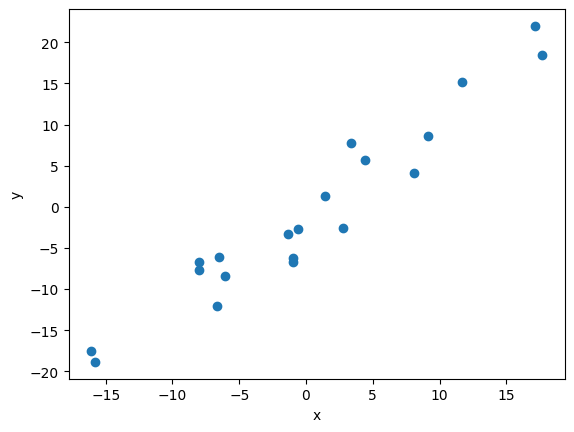

In [ ]:
plt.plot(Xnp, ynp, 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

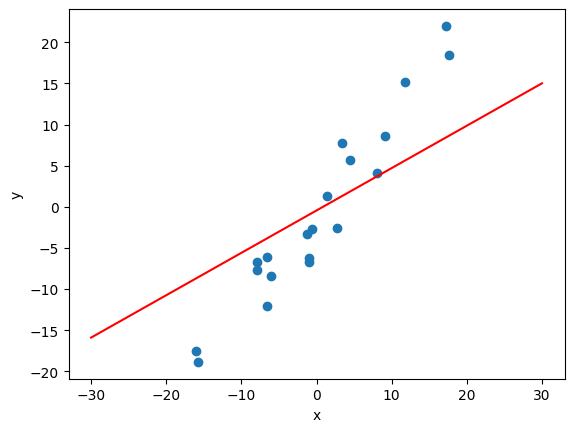

In [ ]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.ylabel('y')
  plt.xlabel('x')
  plt.show()

plot_fit('Initial Model')

In [ ]:
# X = torch.randn(20, 1)*10
# y = X + 3*torch.randn(20, 1)
# Xnp = X.numpy()
# ynp = y.numpy()
# plt.plot(Xnp, ynp, 'o')
# plt.ylabel('y')
# plt.xlabel('x')
# plt.show()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 41.15983581542969
epoch: 1 loss: 24.388851165771484
epoch: 2 loss: 16.263256072998047
epoch: 3 loss: 12.323073387145996
epoch: 4 loss: 10.409260749816895
epoch: 5 loss: 9.476640701293945
epoch: 6 loss: 9.019248962402344
epoch: 7 loss: 8.792143821716309
epoch: 8 loss: 8.676741600036621
epoch: 9 loss: 8.615632057189941
epoch: 10 loss: 8.581008911132812
epoch: 11 loss: 8.559410095214844
epoch: 12 loss: 8.544306755065918
epoch: 13 loss: 8.53253173828125
epoch: 14 loss: 8.522542953491211
epoch: 15 loss: 8.513590812683105
epoch: 16 loss: 8.505302429199219
epoch: 17 loss: 8.497492790222168
epoch: 18 loss: 8.490063667297363
epoch: 19 loss: 8.482965469360352
epoch: 20 loss: 8.476162910461426
epoch: 21 loss: 8.46963882446289
epoch: 22 loss: 8.46337604522705
epoch: 23 loss: 8.45736312866211
epoch: 24 loss: 8.451590538024902
epoch: 25 loss: 8.446045875549316
epoch: 26 loss: 8.44072151184082
epoch: 27 loss: 8.435606956481934
epoch: 28 loss: 8.430696487426758
epoch: 29 loss: 8.4259777

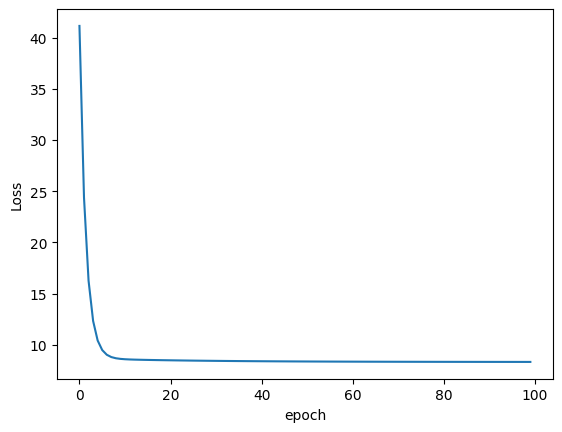

In [ ]:
losses_tensor = torch.tensor(losses)
plt.plot(range(epochs), losses_tensor.detach().numpy())
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()